In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter



# Combine all filter importance files into one csv file

## For merged data predicting GFP

In [6]:
# Base directory containing subdirectories
base_dir = '/pmglocal/ty2514/Enhancer/Enhancer/data/Interpret_ExplaiNN_GFP'

# Lists to store all samples and annotated samples from all CSV files
all_samples_list = []
annotated_samples_list = []

# Iterate through each subdirectory
for sub_dir in os.listdir(base_dir):
    sub_dir_path = os.path.join(base_dir, sub_dir)
    
    # Check if it's a directory and follows the expected naming format
    if os.path.isdir(sub_dir_path) and sub_dir.startswith('CNN') and '_Seed' in sub_dir:
        # Extract CNN and Seed values from the directory name
        parts = sub_dir.split('_')
        cnn_number = parts[0].replace('CNN', '')
        seed_number = parts[1].replace('Seed', '')
        
        # Define paths for the GFP+ CSV file
        gfp_path = os.path.join(sub_dir_path, 'GFP_sorted_tf_order.csv')
        
        # Check if the CSV file exists
        if os.path.exists(gfp_path):
            # Read the CSV file
            gfp_df = pd.read_csv(gfp_path)
            
            # Add CNN and Seed metadata to all samples
            gfp_df['cnn_number'] = cnn_number
            gfp_df['seed_number'] = seed_number
            
            # Append all samples to the list
            all_samples_list.append(gfp_df)
            
            # Filter rows where `tf_name` contains '-'
            annotated_samples = gfp_df[gfp_df['tf_name'].str.contains('-')]
            annotated_samples_list.append(annotated_samples)

# Combine all samples into a single DataFrame
if all_samples_list:
    all_combined_df = pd.concat(all_samples_list, ignore_index=True)
    all_output_path = '/pmglocal/ty2514/Enhancer/Enhancer/data/Filter_Importance/ExplaiNN_merged_GFP_all_filters.csv'
    all_combined_df.to_csv(all_output_path, index=False)
    print(f"All samples saved to {all_output_path}")

# Combine all annotated samples into a single DataFrame
if annotated_samples_list:
    annotated_combined_df = pd.concat(annotated_samples_list, ignore_index=True)
    annotated_output_path = '/pmglocal/ty2514/Enhancer/Enhancer/data/Filter_Importance/ExplaiNN_merged_GFP_annotated_filters.csv'
    annotated_combined_df.to_csv(annotated_output_path, index=False)
    print(f"Annotated samples saved to {annotated_output_path}")
else:
    print("No annotated samples found.")


All samples saved to /pmglocal/ty2514/Enhancer/Enhancer/data/Filter_Importance/ExplaiNN_merged_GFP_all_filters.csv
Annotated samples saved to /pmglocal/ty2514/Enhancer/Enhancer/data/Filter_Importance/ExplaiNN_merged_GFP_annotated_filters.csv


## For merged data predicting G+ and G-

In [17]:
# Base directory containing subdirectories
base_dir = '/pmglocal/ty2514/Enhancer/Enhancer/data/Interpret_ExplaiNN_G+G-'

# Lists to store all samples and annotated samples from all CSV files
GFP_neg_all_samples_list = []
GFP_neg_annotated_samples_list = []
GFP_pos_all_samples_list = []
GFP_pos_annotated_samples_list = []

# Iterate through each subdirectory
for sub_dir in os.listdir(base_dir):
    sub_dir_path = os.path.join(base_dir, sub_dir)
    
    # Check if it's a directory and follows the expected naming format
    if os.path.isdir(sub_dir_path) and sub_dir.startswith('CNN') and '_Seed' in sub_dir:
        # Extract CNN and Seed values from the directory name
        parts = sub_dir.split('_')
        cnn_number = parts[0].replace('CNN', '')
        seed_number = parts[1].replace('Seed', '')
        
        # Define paths for the GFP+ CSV file
        gfp_neg_path = os.path.join(sub_dir_path, 'GFP-_sorted_tf_order.csv')
        gfp_pos_path = os.path.join(sub_dir_path, 'GFP+_sorted_tf_order.csv')

        
        # Check if the CSV file exists
        if os.path.exists(gfp_neg_path) & os.path.exists(gfp_pos_path):
            # Read the CSV file
            gfp_neg_df = pd.read_csv(gfp_neg_path)
            gfp_pos_df = pd.read_csv(gfp_pos_path)
            
            # Add CNN and Seed metadata to all samples
            gfp_neg_df['cnn_number'] = cnn_number
            gfp_neg_df['seed_number'] = seed_number
            gfp_pos_df['cnn_number'] = cnn_number
            gfp_pos_df['seed_number'] = seed_number
            
            # Append all samples to the list
            GFP_neg_all_samples_list.append(gfp_neg_df)
            GFP_pos_all_samples_list.append(gfp_pos_df)
            
            # Filter rows where `tf_name` contains '-'
            GFP_neg_annotated_samples = gfp_neg_df[gfp_neg_df['tf_name'].str.contains('-')]
            GFP_pos_annotated_samples = gfp_pos_df[gfp_pos_df['tf_name'].str.contains('-')]

            GFP_neg_annotated_samples_list.append(GFP_neg_annotated_samples)
            GFP_pos_annotated_samples_list.append(GFP_pos_annotated_samples)

# Combine all samples into a single DataFrame
if GFP_neg_all_samples_list:
    all_combined_df = pd.concat(GFP_neg_all_samples_list, ignore_index=True)
    all_output_path = '/pmglocal/ty2514/Enhancer/Enhancer/data/Filter_Importance/ExplaiNN_merged_G-_all_filters.csv'
    all_combined_df.to_csv(all_output_path, index=False)
    print(f"All samples saved to {all_output_path}")

if GFP_pos_all_samples_list:
    all_combined_df = pd.concat(GFP_pos_all_samples_list, ignore_index=True)
    all_output_path = '/pmglocal/ty2514/Enhancer/Enhancer/data/Filter_Importance/ExplaiNN_merged_G+_all_filters.csv'
    all_combined_df.to_csv(all_output_path, index=False)
    print(f"All samples saved to {all_output_path}")

# Combine all annotated samples into a single DataFrame
if GFP_neg_annotated_samples_list:
    annotated_combined_df = pd.concat(GFP_neg_annotated_samples_list, ignore_index=True)
    annotated_output_path = '/pmglocal/ty2514/Enhancer/Enhancer/data/Filter_Importance/ExplaiNN_merged_G-_annotated_filters.csv'
    annotated_combined_df.to_csv(annotated_output_path, index=False)
    print(f"Annotated G- samples saved to {annotated_output_path}")
else:
    print("No annotated G- samples found.")

# Combine all annotated samples into a single DataFrame
if GFP_pos_annotated_samples_list:
    annotated_combined_df = pd.concat(GFP_pos_annotated_samples_list, ignore_index=True)
    annotated_output_path = '/pmglocal/ty2514/Enhancer/Enhancer/data/Filter_Importance/ExplaiNN_merged_G+_annotated_filters.csv'
    annotated_combined_df.to_csv(annotated_output_path, index=False)
    print(f"Annotated G+ samples saved to {annotated_output_path}")
else:
    print("No annotated G+ samples found.")



All samples saved to /pmglocal/ty2514/Enhancer/Enhancer/data/Filter_Importance/ExplaiNN_merged_G-_all_filters.csv
All samples saved to /pmglocal/ty2514/Enhancer/Enhancer/data/Filter_Importance/ExplaiNN_merged_G+_all_filters.csv
Annotated G- samples saved to /pmglocal/ty2514/Enhancer/Enhancer/data/Filter_Importance/ExplaiNN_merged_G-_annotated_filters.csv
Annotated G+ samples saved to /pmglocal/ty2514/Enhancer/Enhancer/data/Filter_Importance/ExplaiNN_merged_G+_annotated_filters.csv


# Plotting filter importance across different number of cnns

In [8]:
def plot_filter_importance(file_dir, anno_type = 'motif_name_unique', cnn_lim = 100, top_k_filter = 5, min_filter_occur = 1):
    if anno_type not in ['motif_name_unique', 'cluster_name_unique']:
        raise KeyError("anno_type has to be ['motif_name_unique', 'cluster_name_unique']")
    cluster_to_tf_map = {}
    if anno_type == 'cluster_name_unique':
        # If use cluster name to represent filters, create a map to map from cluster name to motifs
        # Load the metadata file
        metadata_df = pd.read_csv('/pmglocal/ty2514/Enhancer/motif-clustering/JASPAR2024_mus_musculus_non-redundant_results/metadata.tsv', sep='\t')

        # Group by 'cluster' and combine 'tf_name' into a single string separated by '/'
        # Keep only the first three tf_names if there are more than three
        cluster_to_tf_map = (
            metadata_df.groupby('cluster')['tf_name']
            .apply(lambda x: '/'.join(x.unique()[:3]))  # Limit to the first three unique tf_names
            .to_dict()
        )
        
    # Load annotated_combined_df (assuming it has been saved and loaded here)
    annotated_combined_df_path = file_dir
    annotated_combined_df = pd.read_csv(annotated_combined_df_path)
    annotated_combined_df = annotated_combined_df[annotated_combined_df['cnn_number'] <= cnn_lim]
    annotated_combined_df['cluster_name'] = annotated_combined_df['tf_name'].str.split('(').str[0]
    annotated_combined_df['motif_name'] = annotated_combined_df['tf_name'].str.extract(r'\(([^)]+)\)', expand=False)
    # Handle cases with "/" in the motif name
    annotated_combined_df['motif_name_unique'] = annotated_combined_df['motif_name'].str.split('/').str[0]
    annotated_combined_df['cluster_name_unique'] = annotated_combined_df['cluster_name'].str.split('/').str[0]
    # Prepare unique CNN numbers and sort them
    cnn_numbers = sorted(annotated_combined_df['cnn_number'].unique().astype(int))

    # Initialize a dictionary to store results
    filter_scores = {}
    unique_filters_all_cnns = []
    # Group by cnn_number and filter_name
    for cnn in cnn_numbers:
        group = annotated_combined_df[annotated_combined_df['cnn_number'] == cnn]
        #unique_filters = group['filter_name'].unique()

        unique_filters = group[anno_type].value_counts()
        unique_filters = unique_filters[unique_filters >= min_filter_occur].index.tolist()

        print(f"CNN {cnn} has {unique_filters}")
        unique_filters_all_cnns = unique_filters_all_cnns + unique_filters
        for filter_name in unique_filters:
            filter_group = group[group[anno_type] == filter_name]
            scores = filter_group['importance_score']
            samples = filter_group['activated_samples']
            # Calculate the weighted mean importance score
            mean_score = np.sum(scores * samples) / np.sum(samples)
            if filter_name not in filter_scores:
                filter_scores[filter_name] = {cnn: mean_score}
            else:
                filter_scores[filter_name][cnn] = mean_score

    # Add missing CNN numbers for each filter and annotate as 0
    for filter_name in filter_scores:
        for cnn in cnn_numbers:
            if cnn not in filter_scores[filter_name]:
                filter_scores[filter_name][cnn] = 0

    # Prepare data for plotting
    cnn_sorted = sorted(cnn_numbers)
    filters_sorted = sorted(filter_scores.keys())
    plot_data = {filter_name: [filter_scores[filter_name].get(cnn, 0) for cnn in cnn_sorted] for filter_name in filters_sorted}

    # Count the occurrences of each filter
    filter_counts = Counter(unique_filters_all_cnns)
    print(filter_counts)

    # Find the top filters with the highest occurrences
    top_filters = [filter_name for filter_name, _ in filter_counts.most_common(top_k_filter)]
    if anno_type == 'cluster_name_unique':
        motif_names = [cluster_to_tf_map.get(cluster, "No motif names found") for cluster in top_filters]
        print(f"top {top_k_filter} motifs: {motif_names}")

    # Updated plot with wider bars
    fig, axes = plt.subplots(len(top_filters), 1, figsize=(12, 2.4*top_k_filter), sharex=True, gridspec_kw={'hspace': 0.5})

    bar_width = 4  # Increase bar width for better visibility

    for i, filter_name in enumerate(top_filters):
        ax = axes[i]
        scores = plot_data[filter_name]
        ax.bar(cnn_sorted, scores, color=f"C{i}", width=bar_width, alpha=0.7)

        # Set y-axis label to filter name
        if anno_type == 'cluster_name_unique':
            motif_name = cluster_to_tf_map[filter_name]
            ax.set_ylabel(motif_name, fontsize=12)
        else:
            ax.set_ylabel(filter_name, fontsize=12)

        # Draw a horizontal line at y=0.00
        ax.axhline(y=0.00, color='black', linewidth=0.8, linestyle='--')

        # Remove frames
        for spine in ['top', 'right', 'left', 'bottom']:
            ax.spines[spine].set_visible(False)

        # Set x-axis range and ticks
        ax.set_xticks(cnn_sorted)
        ax.set_xlim(min(cnn_sorted) - bar_width, max(cnn_sorted) + bar_width)

    # Common x-axis configuration
    axes[-1].set_xlabel('Number of CNNs', fontsize=14)

    # Add a big title
    plt.suptitle('Mean Importance Score', fontsize=16, y=0.95)
    plt.tight_layout(rect=[0, 0, 1, 0.92])

    # Show the plot
    plt.show()

CNN 10 has ['AC0069']
CNN 15 has ['AC0069', 'AC0028', 'AC0048', 'AC0066']
CNN 20 has ['AC0069', 'AC0065', 'AC0047', 'AC0070', 'AC0002']
CNN 25 has ['AC0069', 'AC0065']
CNN 30 has ['AC0069', 'AC0064', 'AC0074', 'AC0065', 'AC0073', 'AC0012']
CNN 35 has ['AC0069', 'AC0033']
CNN 40 has ['AC0069', 'AC0066', 'AC0002', 'AC0065', 'AC0037']
CNN 45 has ['AC0069', 'AC0045', 'AC0002']
CNN 50 has ['AC0069', 'AC0065', 'AC0066', 'AC0002', 'AC0070']
CNN 55 has ['AC0069', 'AC0081', 'AC0074', 'AC0047', 'AC0002']
CNN 60 has ['AC0069', 'AC0064', 'AC0066', 'AC0065', 'AC0047', 'AC0012']
CNN 65 has ['AC0069', 'AC0064', 'AC0074', 'AC0052', 'AC0047', 'AC0070', 'AC0065', 'AC0026', 'AC0002']
CNN 70 has ['AC0069', 'AC0066', 'AC0002', 'AC0012', 'AC0079', 'AC0073', 'AC0026', 'AC0074', 'AC0068', 'AC0043']
CNN 75 has ['AC0069', 'AC0002', 'AC0065', 'AC0028', 'AC0012', 'AC0070']
CNN 80 has ['AC0069', 'AC0070', 'AC0026', 'AC0002', 'AC0012', 'AC0076', 'AC0004', 'AC0047', 'AC0052', 'AC0073']
CNN 85 has ['AC0069', 'AC0064'

/tmp/ipykernel_667891/3697655841.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.92])


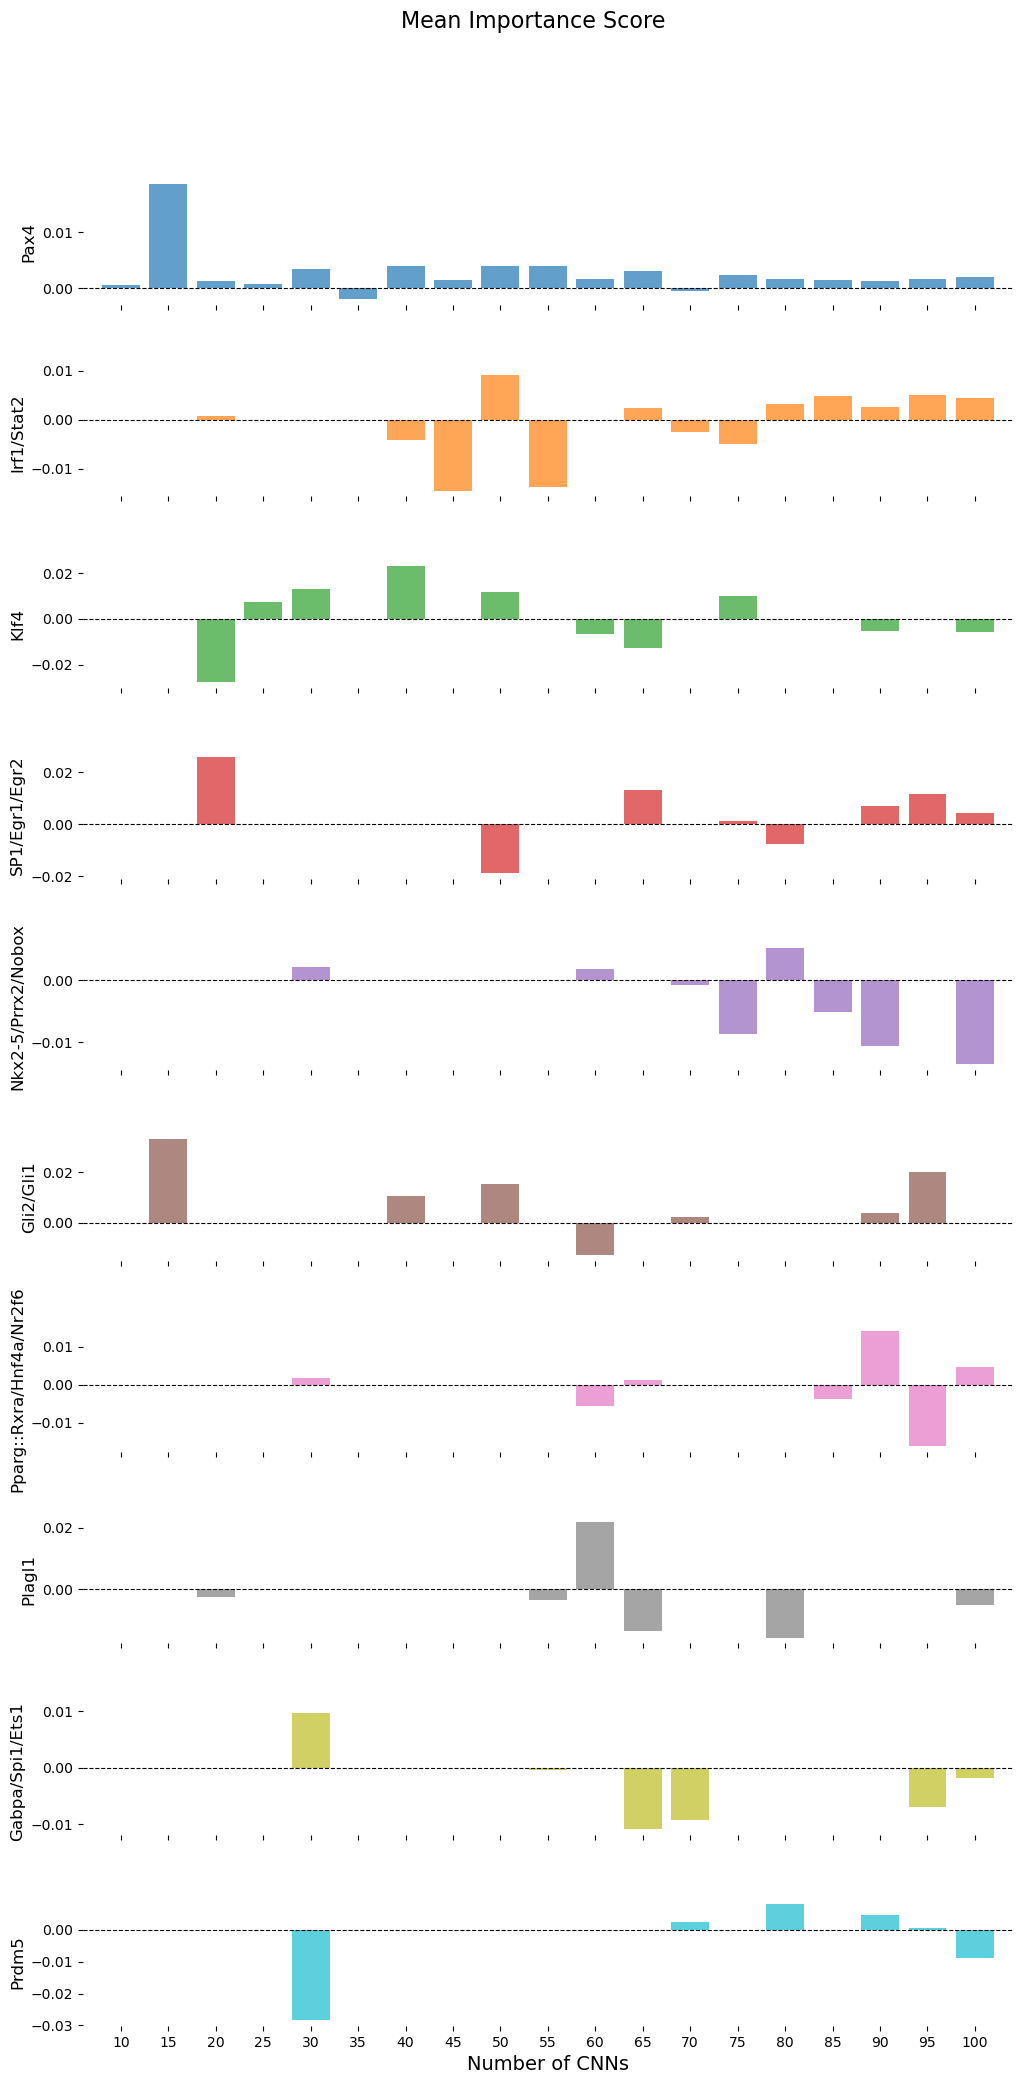

In [9]:
file_path = '/pmglocal/ty2514/Enhancer/Enhancer/data/Filter_Importance/ExplaiNN_merged_GFP_annotated_filters.csv'
plot_filter_importance(file_dir = file_path,  anno_type = 'cluster_name_unique',cnn_lim = 100, top_k_filter = 10, min_filter_occur = 2)

CNN 10 has ['AC0069']
CNN 15 has ['AC0069', 'AC0066']
CNN 20 has ['AC0069']
CNN 25 has ['AC0069']
CNN 30 has ['AC0069']
CNN 35 has ['AC0069']
CNN 40 has ['AC0069', 'AC0074', 'AC0045', 'AC0072']
CNN 45 has ['AC0069', 'AC0066', 'AC0070', 'AC0012', 'AC0053', 'AC0054', 'AC0081', 'AC0063']
CNN 50 has ['AC0069', 'AC0064', 'AC0068', 'AC0028', 'AC0065', 'AC0002']
CNN 55 has ['AC0069', 'AC0002', 'AC0066', 'AC0045', 'AC0028', 'AC0070', 'AC0064']
CNN 60 has ['AC0069', 'AC0064', 'AC0070', 'AC0063']
CNN 65 has ['AC0069', 'AC0002', 'AC0073', 'AC0047', 'AC0081']
CNN 70 has ['AC0069', 'AC0065', 'AC0047', 'AC0068', 'AC0072', 'AC0066']
CNN 75 has ['AC0069', 'AC0047', 'AC0066', 'AC0064', 'AC0002', 'AC0058', 'AC0072']
CNN 80 has ['AC0069', 'AC0070', 'AC0047', 'AC0002', 'AC0026', 'AC0073', 'AC0065']
CNN 85 has ['AC0069', 'AC0065', 'AC0066', 'AC0052', 'AC0028', 'AC0002', 'AC0012']
CNN 90 has ['AC0069', 'AC0002', 'AC0048', 'AC0047', 'AC0079', 'AC0056', 'AC0058']
CNN 95 has ['AC0069', 'AC0064', 'AC0068', 'AC0

/tmp/ipykernel_667891/3697655841.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.92])


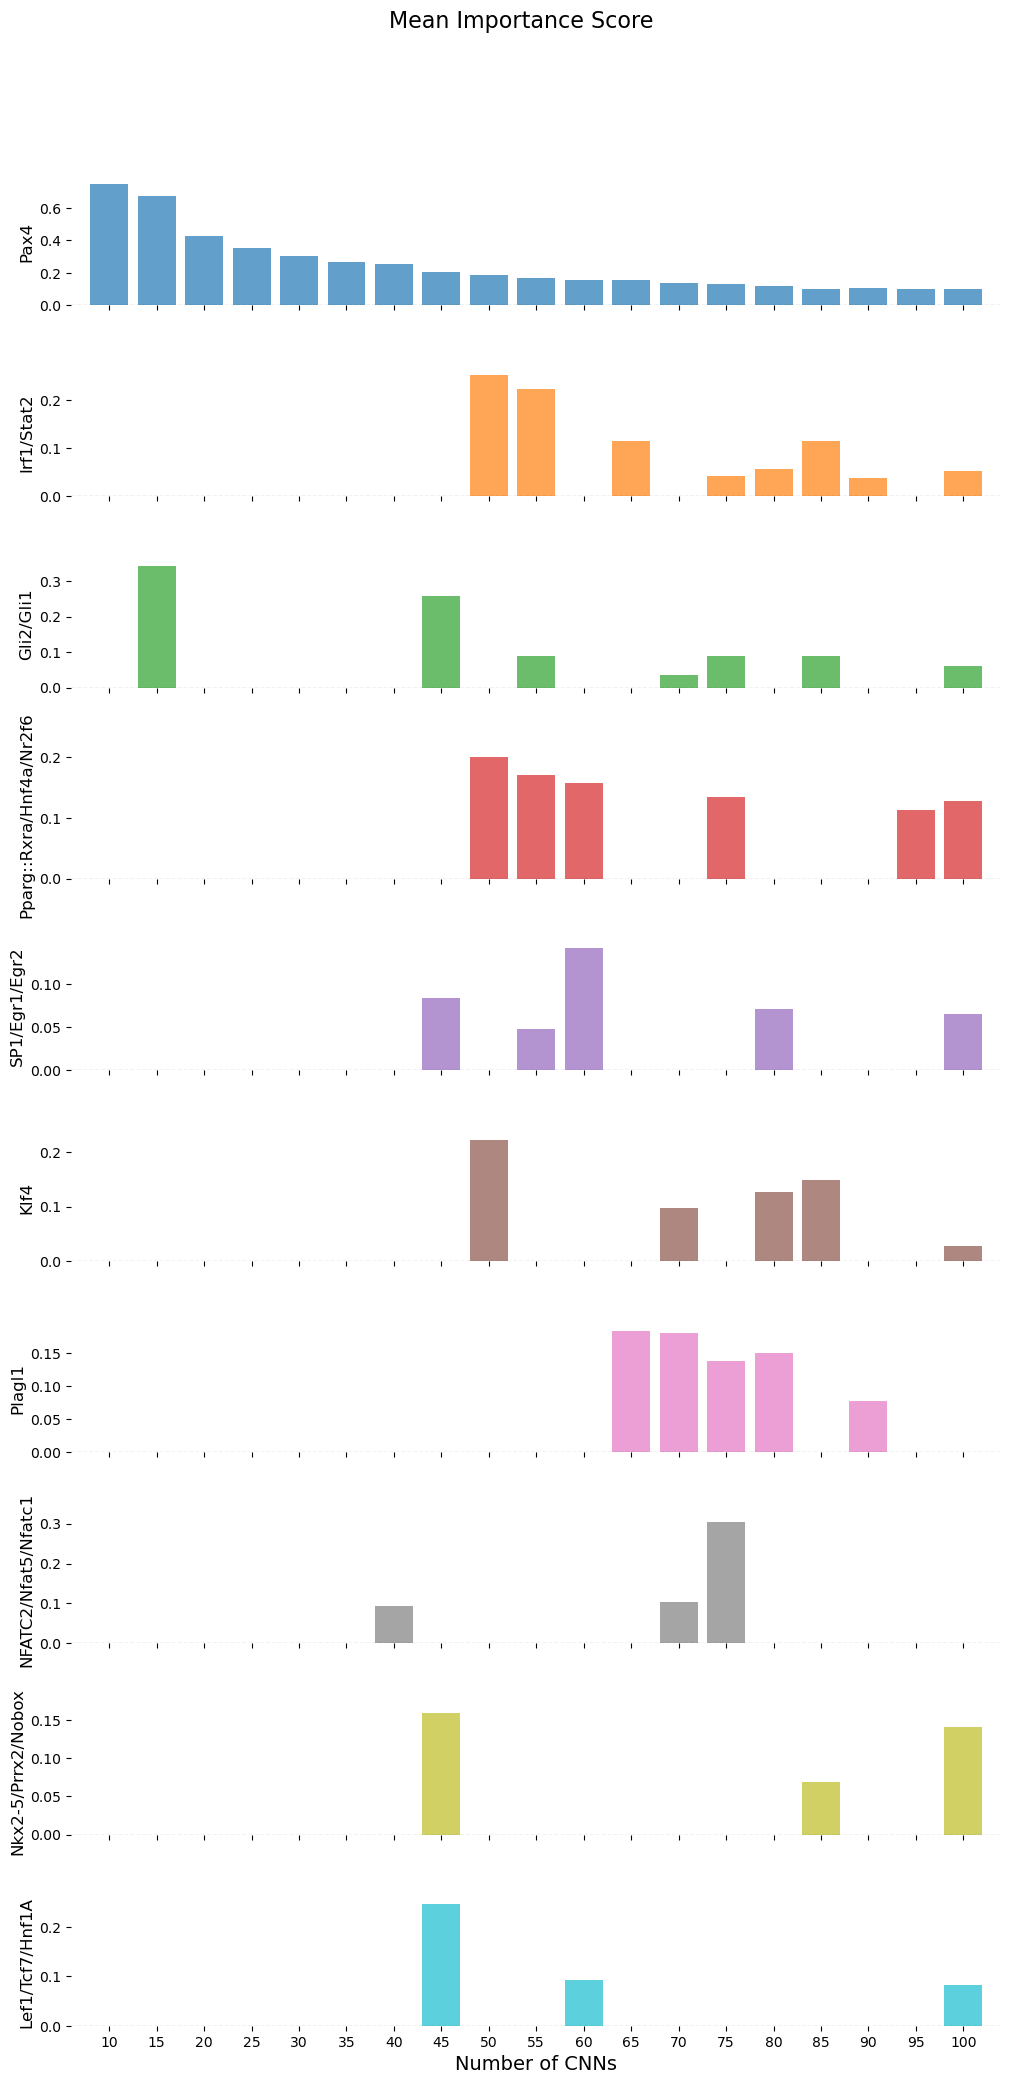

In [10]:
file_path = '/pmglocal/ty2514/Enhancer/Enhancer/data/Filter_Importance/ExplaiNN_merged_G+_annotated_filters.csv'
plot_filter_importance(file_dir = file_path, anno_type = 'cluster_name_unique', cnn_lim = 100, top_k_filter = 10, min_filter_occur = 2)

CNN 10 has ['AC0069']
CNN 15 has ['AC0069', 'AC0066']
CNN 20 has ['AC0069']
CNN 25 has ['AC0069']
CNN 30 has ['AC0069']
CNN 35 has ['AC0069']
CNN 40 has ['AC0069', 'AC0074', 'AC0045', 'AC0072']
CNN 45 has ['AC0069', 'AC0066', 'AC0070', 'AC0012', 'AC0081', 'AC0054', 'AC0053', 'AC0063']
CNN 50 has ['AC0069', 'AC0064', 'AC0028', 'AC0068', 'AC0065', 'AC0002']
CNN 55 has ['AC0069', 'AC0002', 'AC0066', 'AC0045', 'AC0028', 'AC0070', 'AC0064']
CNN 60 has ['AC0069', 'AC0064', 'AC0070', 'AC0063']
CNN 65 has ['AC0069', 'AC0002', 'AC0073', 'AC0047', 'AC0081']
CNN 70 has ['AC0069', 'AC0065', 'AC0047', 'AC0068', 'AC0066', 'AC0072']
CNN 75 has ['AC0069', 'AC0047', 'AC0066', 'AC0064', 'AC0002', 'AC0058', 'AC0072']
CNN 80 has ['AC0069', 'AC0070', 'AC0073', 'AC0065', 'AC0002', 'AC0047', 'AC0026']
CNN 85 has ['AC0069', 'AC0028', 'AC0066', 'AC0065', 'AC0052', 'AC0002', 'AC0012']
CNN 90 has ['AC0069', 'AC0002', 'AC0079', 'AC0047', 'AC0048', 'AC0056', 'AC0058']
CNN 95 has ['AC0069', 'AC0064', 'AC0068', 'AC0

/tmp/ipykernel_667891/3697655841.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.92])


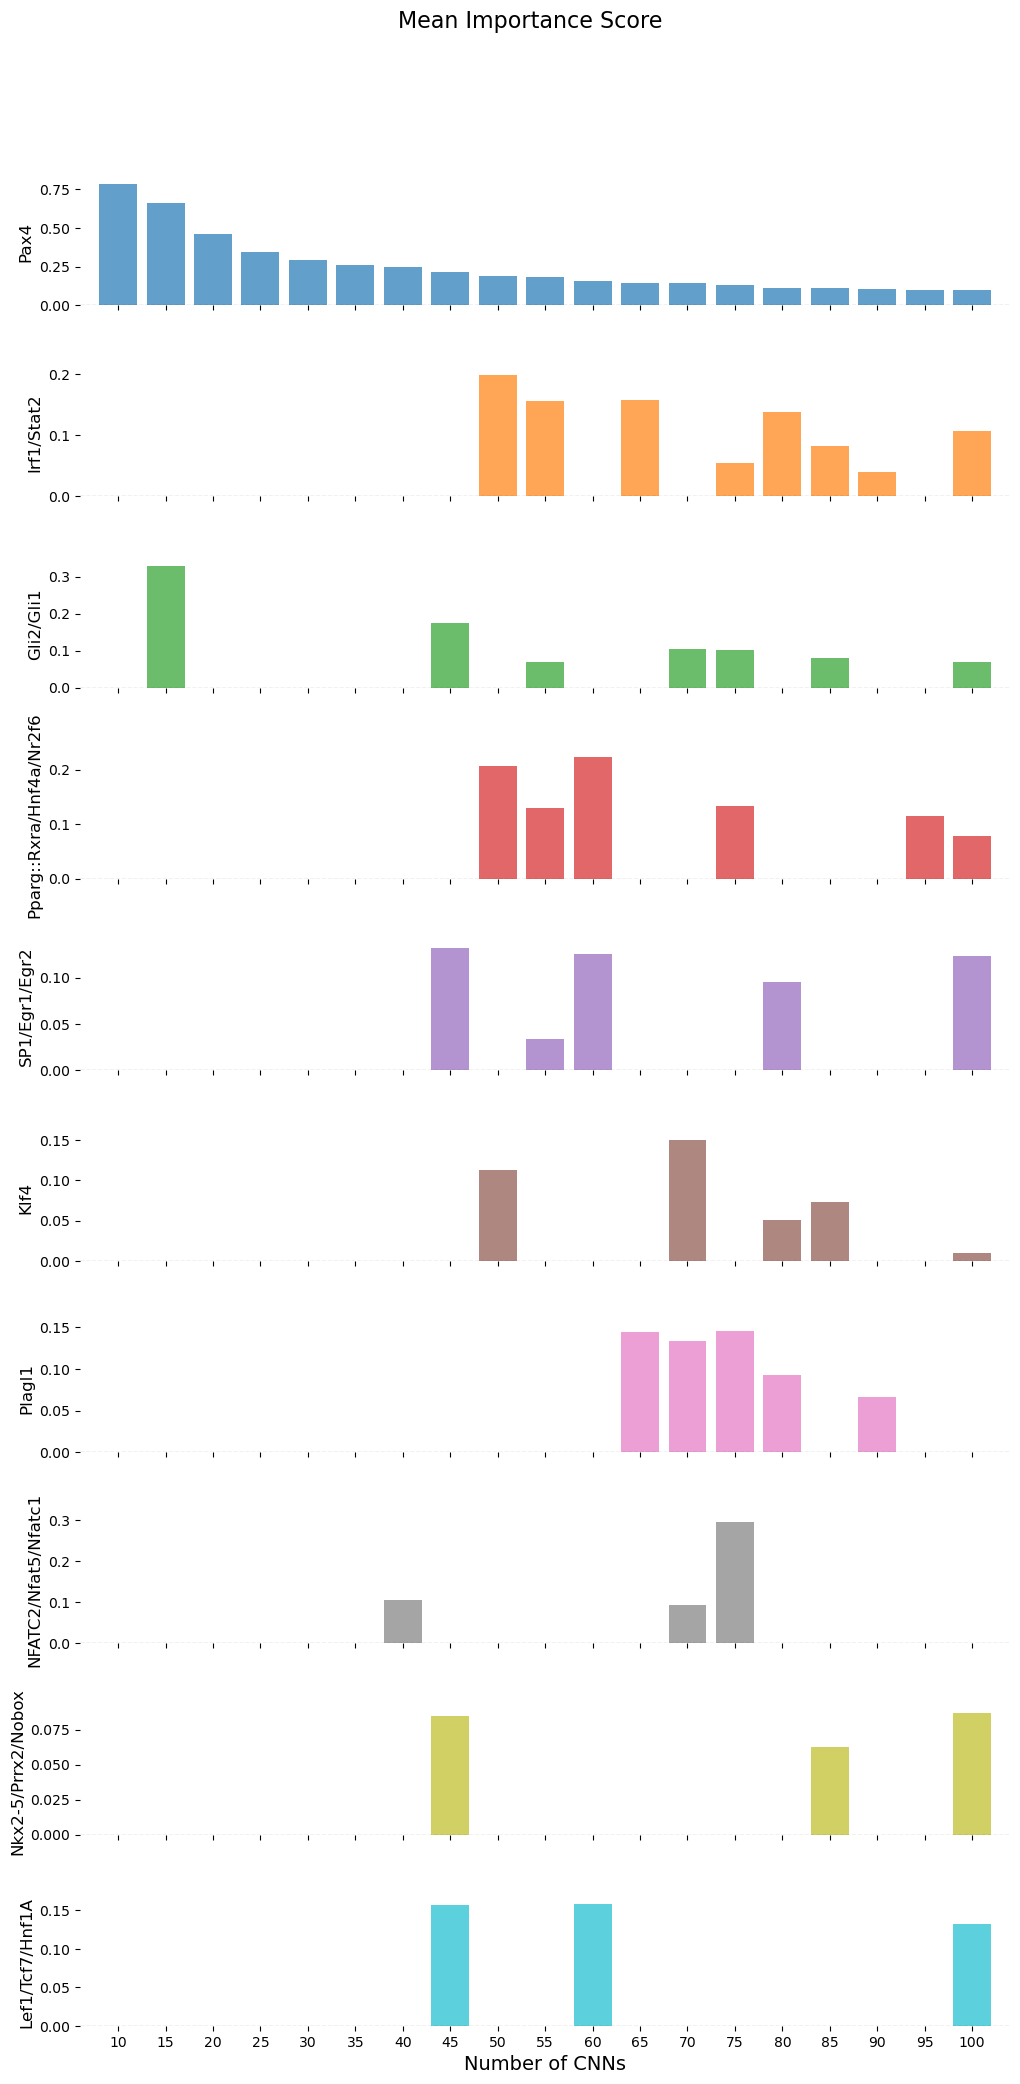

In [11]:
file_path = '/pmglocal/ty2514/Enhancer/Enhancer/data/Filter_Importance/ExplaiNN_merged_G-_annotated_filters.csv'
plot_filter_importance(file_dir = file_path, anno_type = 'cluster_name_unique', cnn_lim = 100, top_k_filter = 10, min_filter_occur = 2)